In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import math

In [2]:
def save_image(plt, path=None):
    if path:
        plt.savefig(path)

In [3]:
def clean_columns(data, missing_bound=.5):
    """
    This function remove those columns whose missing value(in percentage) >= missing_bound
    data: the given data
    missing_bound: in percent (0, 1)
    """
    tmp_data = data
    for col in data.columns:
        missing_values_per_column = data[col].isnull().sum()
        total_rows = data[col].shape[0]
        missing_percentage = missing_values_per_column/total_rows
        
        if (missing_percentage >= missing_bound):
            print("Removing column: ", col, ", Missing value: ", missing_percentage*100)
            data = data.drop(columns=col)
    print("Number of columns removed: ", tmp_data.shape[1]-data.shape[1])        
    return data

In [4]:
def get_cols_having_missing_values(data, show_non_missing_columns=False):
    """
    Prints number of missing values in percentage columnwise.
    If show_non_missing_columns=False, it only shows columns that has at least 1 missing value.
    else shows all values.
    
    return the cols that has some missing columns
    """
    cols = []
    for col in data.columns:
        missing_values_per_column = data[col].isnull().sum()
        total_rows = data[col].shape[0]
        missing_percentage = missing_values_per_column/total_rows
        if show_non_missing_columns==False:
            if missing_percentage>0.0:
                print("Column: ", col, ", Missing value: ", missing_percentage*100)
                cols.append(col)
        else:
            print("Column: ", col, ", Missing value: ", missing_percentage*100)
            cols.append(col)
    
    return cols

In [5]:
def fill_missing_values(data, columns=None):
    """
    columns: columns names in array format. e.g ['a', 'b', 'c']
    If data_type is 'object or string', fill the missing values with the mode.
    If data_type is 'numerical', fill the missing values with the mean.
    """
    for col in columns:
        if is_string_dtype(data[col]):
            data[col].fillna(data[col].mode()[0], inplace=True) #Pandas 0.24.0+ does not count NaN by default as mode value. 
        elif is_numeric_dtype(data[col]):
            data[col].fillna(data[col].mean()[0], inplace=True) #fill the missing values with mean if the column is numeric data type
        
    return data
        

In [22]:
def make_histograms(df, columns=None, figsize=(15,15), cmap=None, image_path=None):
    """
    This function make histograms for each column name. Each of the column should be 'Nominal'
    Parameters
    ----------
    df: pandas dataframe
        Pandas dataframe associated with column names.
    columns: dataframe column names in array
        e.g. ['aColumn', 'bColumn']
    figsize: default=(15, 15)
    cmap: colormap codes for for custom colored bar or histogram
        defautls are:
            summer or green for numerical
            winter or blue for categorical
    Effects
    -------
    Creates columns.size() number of histograms. 
    """
    nrows = 3
    ncols = 3
    plt.figure(figsize=figsize)
    for i, col in enumerate(df[columns]):
        plt.subplot(nrows,ncols,i+1)
        if is_numeric_dtype(df[col]):
            df[col].plot(kind="hist", colormap=(cmap or "summer")).set_title(col)
        else:
            df[col].value_counts().plot(kind="bar", colormap=(cmap or "winter")).set_title(col)
    
    plt.subplots_adjust(top = .95, bottom=.05, hspace=.5, wspace=0.4)
    
    if image_path:
        plt.savefig(image_path)
    plt.show();

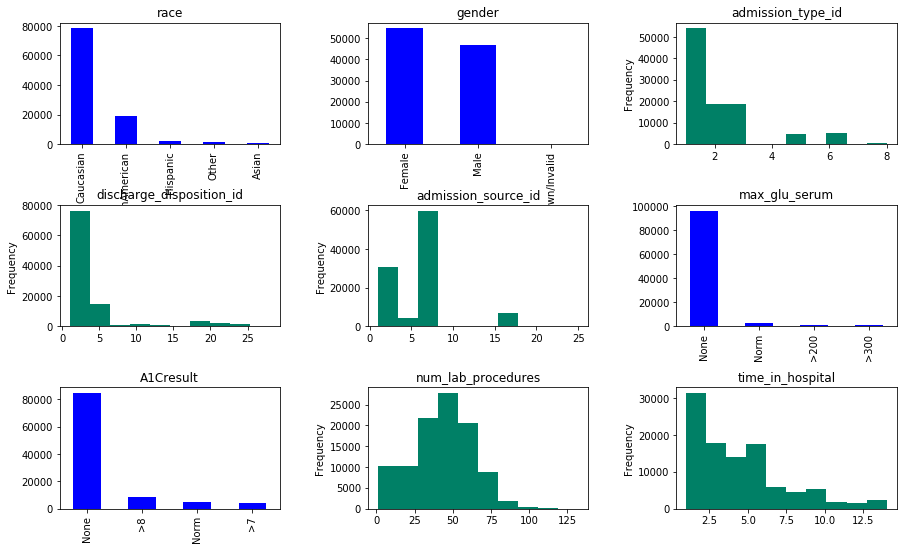

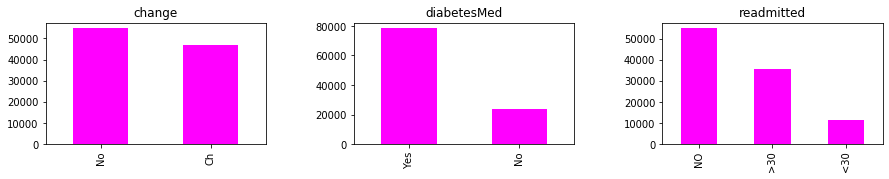

In [23]:
##### This block for data visualization #####
make_histograms(raw_data, ["race", "gender", "admission_type_id", "discharge_disposition_id", "admission_source_id", "max_glu_serum", "A1Cresult", "num_lab_procedures", "time_in_hospital"], image_path="../outputs/attr_hist_plot.png")
make_histograms(raw_data, ["change", "diabetesMed", "readmitted"], figsize=(15, 15), cmap="spring", image_path="../outputs/class_attr_hist_plot.png")

In [8]:
##### This block is for data cleaning #####
missing_values = ["n/a", "na", "--", "?"]
raw_data = pd.read_csv('../dataset_diabetes/diabetic_data.csv', delimiter=',', na_values = missing_values)
#print(raw_data.head()) # print head of the data
#print(raw_data.describe()) # shows numerical columns statistics e.g. count, mean, std, min, max etc
#print(raw_data.shape) # prints shape of the dataset (101766, 50)
#print(raw_data["weight"].isnull().sum()) #prints number of null values in weight column
#print(raw_data["weight"].shape[0]) #prints number of columns in weight column
raw_data = clean_columns(raw_data, missing_bound=.2)
cols_having_missing_values = get_cols_having_missing_values(raw_data, False) # cols having missing values
#raw_data.dtypes #shows the column data types
raw_data = fill_missing_values(raw_data, cols_having_missing_values)
#print(get_cols_having_missing_values(raw_data, False)) #no columns with missing values
print("Filled the missing values either by the mode or mean value")

/media/akabir/New Volume/python3_virtual_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Removing column:  weight , Missing value:  96.85847925633315
Removing column:  payer_code , Missing value:  39.5574160328597
Removing column:  medical_specialty , Missing value:  49.08220820313268
Number of columns removed:  3
Column:  race , Missing value:  2.2335554114340743
Column:  diag_1 , Missing value:  0.02063557573256294
Column:  diag_2 , Missing value:  0.3517874339170253
Column:  diag_3 , Missing value:  1.398305917497003
Filled the missing values either by the mode or mean value


In [43]:
math.ceil(1.2)

2